In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

 ········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = """
SELECT
    f.film_id,
    f.title,
    c.name AS category,
    f.rental_rate,
    f.length,
    f.rating,
    f.language_id,
    r.rental_date,
    r.return_date,
    DATEDIFF(r.return_date, r.rental_date) AS rental_length,
    CASE WHEN EXISTS (
        SELECT 1
        FROM rental r2
        JOIN inventory i ON r2.inventory_id = i.inventory_id
        WHERE i.film_id = f.film_id
        AND YEAR(r2.rental_date) = 2005
        AND MONTH(r2.rental_date) = 5
    ) THEN TRUE ELSE FALSE END AS rented_in_may
FROM
    film f
JOIN
    film_category fc ON f.film_id = fc.film_id
JOIN
    category c ON fc.category_id = c.category_id
LEFT JOIN
    inventory i ON f.film_id = i.film_id
LEFT JOIN
    rental r ON i.inventory_id = r.inventory_id;
"""
log_reg = pd.read_sql_query(query, engine)
log_reg.head(50)

,film_id,title,category,rental_rate,length,rating,language_id,rental_date,return_date,rental_length,rented_in_may
0,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-08-02 01:16:59,2005-08-03 02:41:59,1.0,1
1,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-08-18 04:26:54,2005-08-23 06:40:54,5.0,1
2,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-06-20 20:35:28,2005-06-26 01:01:28,6.0,1
3,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-07-09 05:01:58,2005-07-18 08:17:58,9.0,1
4,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-07-30 08:02:39,2005-08-06 12:02:39,7.0,1
5,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-08-21 17:51:06,2005-08-28 15:36:06,7.0,1
6,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-05-28 12:08:37,2005-05-29 16:25:37,1.0,1
7,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-06-20 00:08:38,2005-06-23 19:35:38,3.0,1
8,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-07-11 02:37:51,2005-07-16 22:34:51,5.0,1
9,19,AMADEUS HOLY,Action,0.99,113,PG,1,2005-07-28 07:21:55,2005-08-03 06:33:55,6.0,1


In [3]:
log_reg.info

<bound method DataFrame.info of        film_id                title category  rental_rate  length rating  \
0           19         AMADEUS HOLY   Action         0.99     113     PG   
1           19         AMADEUS HOLY   Action         0.99     113     PG   
2           19         AMADEUS HOLY   Action         0.99     113     PG   
3           19         AMADEUS HOLY   Action         0.99     113     PG   
4           19         AMADEUS HOLY   Action         0.99     113     PG   
...        ...                  ...      ...          ...     ...    ...   
16082      989  WORKING MICROCOSMOS   Travel         4.99      74      R   
16083      989  WORKING MICROCOSMOS   Travel         4.99      74      R   
16084      989  WORKING MICROCOSMOS   Travel         4.99      74      R   
16085      989  WORKING MICROCOSMOS   Travel         4.99      74      R   
16086      989  WORKING MICROCOSMOS   Travel         4.99      74      R   

       language_id         rental_date         return_d

In [4]:
log_reg.shape

(16087, 11)

In [5]:
log_reg.columns

Index(['film_id', 'title', 'category', 'rental_rate', 'length', 'rating',
       'language_id', 'rental_date', 'return_date', 'rental_length',
       'rented_in_may'],
      dtype='object')

In [6]:
log_reg.isna().T

,0,1,2,3,4,5,6,7,8,9,...,16077,16078,16079,16080,16081,16082,16083,16084,16085,16086
film_id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
category,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rental_rate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
length,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
language_id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rental_date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
return_date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rental_length,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:

log_reg=log_reg.drop(columns=['language_id','return_date', 'rental_date'])

In [8]:
log_reg.dtypes

film_id            int64
title             object
category          object
rental_rate      float64
length             int64
rating            object
rental_length    float64
rented_in_may      int64
dtype: object

In [9]:
# Category type of the movies
value_counts = log_reg['category'].value_counts()
value_counts

category
Sports         1180
Animation      1168
Action         1115
Sci-Fi         1103
Family         1098
Drama          1061
Documentary    1056
Foreign        1039
Games           972
Children        947
Comedy          943
New             943
Classics        942
Horror          849
Travel          841
Music           830
Name: count, dtype: int64

In [10]:
log_reg.isna().sum()

film_id            0
title              0
category           0
rental_rate        0
length             0
rating             0
rental_length    226
rented_in_may      0
dtype: int64

In [11]:
log_reg.dtypes

film_id            int64
title             object
category          object
rental_rate      float64
length             int64
rating            object
rental_length    float64
rented_in_may      int64
dtype: object

In [12]:
# Three type of rating for rentals, 0,99, 2,99 & 4,99
value_counts = log_reg['rental_rate'].value_counts()
value_counts

rental_rate
0.99    5668
4.99    5288
2.99    5131
Name: count, dtype: int64

In [13]:
# REnted in May | 1 = rented, 0 = not rented
value_counts = log_reg['rented_in_may'].value_counts()
value_counts

rented_in_may
1    12723
0     3364
Name: count, dtype: int64

In [14]:
# data frame with random sample of 1000 rows  
film = log_reg.sample(n=1000, random_state=42)
film.head()

,film_id,title,category,rental_rate,length,rating,rental_length,rented_in_may
8658,414,HELLFIGHTERS SIERRA,Foreign,2.99,75,PG,2.0,1
14349,323,FLIGHT LIES,Sports,4.99,179,R,6.0,0
15290,84,BOILED DARES,Travel,4.99,102,PG,2.0,1
4269,127,CAT CONEHEADS,Comedy,4.99,112,G,7.0,1
9520,232,DIRTY ACE,Games,2.99,147,NC-17,4.0,1


In [15]:
film.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
film_id,1000.0,503.041000,295.027101,1.00,253.75,487.50,764.50,999.00
rental_rate,1000.0,2.950000,1.666486,0.99,0.99,2.99,4.99,4.99
length,1000.0,116.206000,40.521915,46.00,80.00,115.00,149.00,185.00
rental_length,993.0,5.026183,2.594838,0.00,3.00,5.00,7.00,10.00
rented_in_may,1000.0,0.801000,0.399448,0.00,1.00,1.00,1.00,1.00


In [16]:
film.dtypes

film_id            int64
title             object
category          object
rental_rate      float64
length             int64
rating            object
rental_length    float64
rented_in_may      int64
dtype: object

In [17]:
film.isnull().T

,8658,14349,15290,4269,9520,7889,12209,13824,6162,13750,...,15444,7332,11206,6275,13209,7046,9620,932,8903,9128
film_id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
category,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rental_rate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
length,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rental_length,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rented_in_may,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
import matplotlib.pyplot as plt #give alias plt & sns for visualization libraries
import seaborn as sns #inline shows inside notebook
%matplotlib inline

<Axes: xlabel='category', ylabel='rented_in_may'>

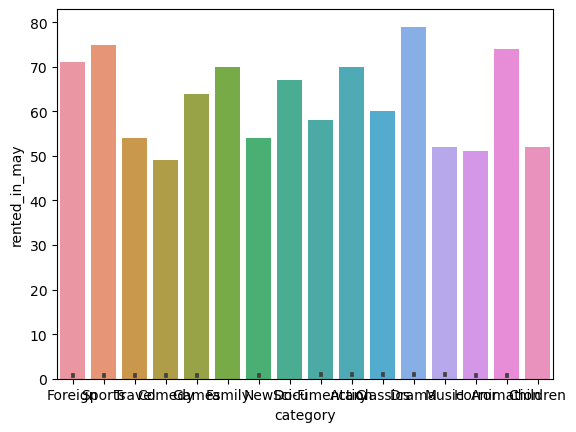

In [20]:
sns.countplot(x=film["category"])
sns.barplot(y=film["rented_in_may"], x=film["category"],data=film)

In [21]:
#numerical data in daraframe
numerical = film._get_numeric_data()   
numerical

,film_id,rental_rate,length,rental_length,rented_in_may
8658,414,2.99,75,2.0,1
14349,323,4.99,179,6.0,0
15290,84,4.99,102,2.0,1
4269,127,4.99,112,7.0,1
9520,232,2.99,147,4.0,1
...,...,...,...,...,...
7046,827,4.99,141,3.0,1
9620,331,2.99,90,6.0,1
932,850,0.99,163,1.0,1
8903,531,0.99,137,7.0,1


In [22]:
#catorgical data in dataframe
categoricals = film.select_dtypes("object") 
categoricals

,title,category,rating
8658,HELLFIGHTERS SIERRA,Foreign,PG
14349,FLIGHT LIES,Sports,R
15290,BOILED DARES,Travel,PG
4269,CAT CONEHEADS,Comedy,G
9520,DIRTY ACE,Games,NC-17
...,...,...,...
7046,SPICE SORORITY,Drama,NC-17
9620,FORWARD TEMPLE,Games,NC-17
932,STORY SIDE,Action,R
8903,LOSE INCH,Foreign,R


In [23]:
#film['title'].value_counts()
film['category'].value_counts()

category
Drama          79
Sports         75
Animation      74
Foreign        71
Family         70
Action         70
Sci-Fi         67
Games          64
Classics       60
Documentary    58
Travel         54
New            54
Music          52
Children       52
Horror         51
Comedy         49
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

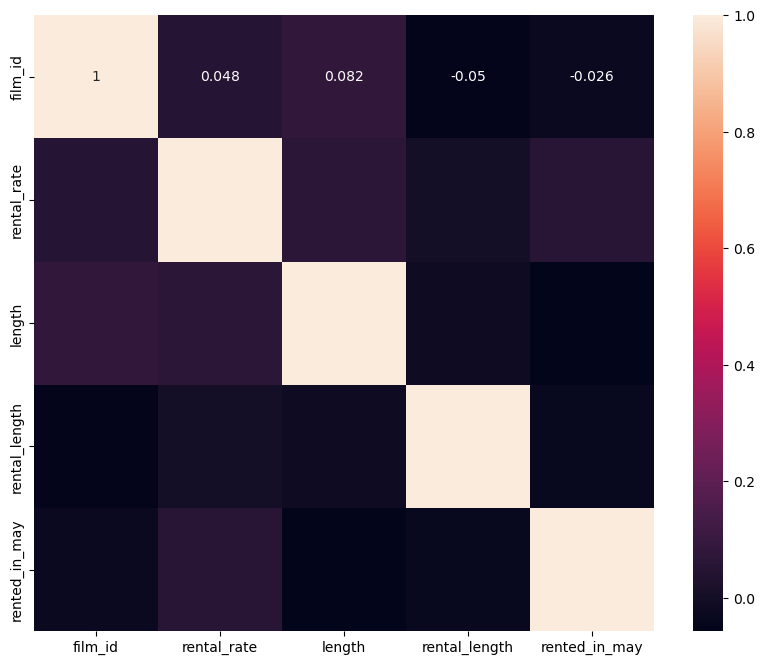

In [25]:
corr_matrix=film.select_dtypes('number').corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


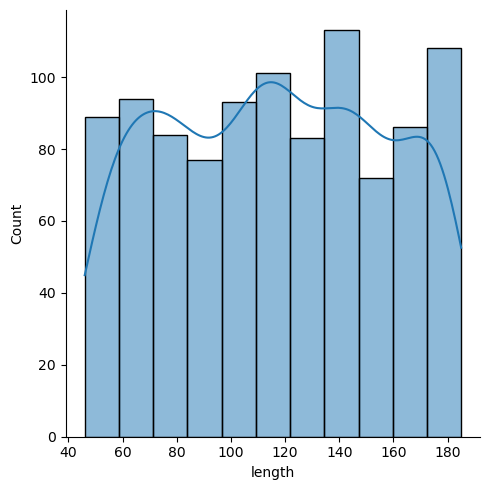

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


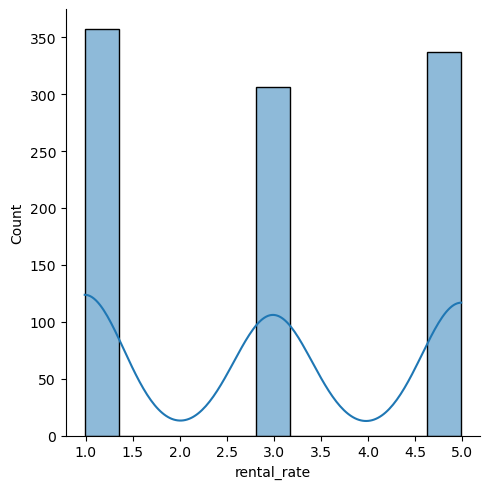

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


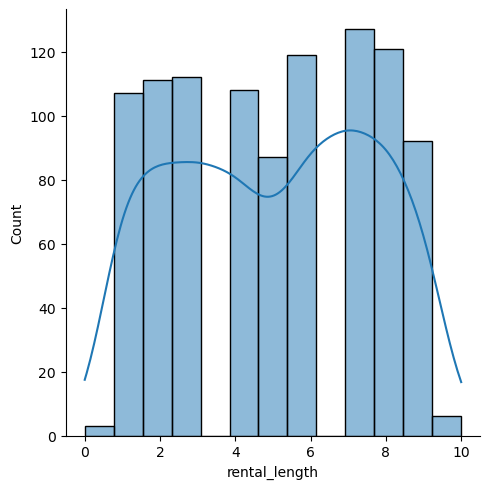

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


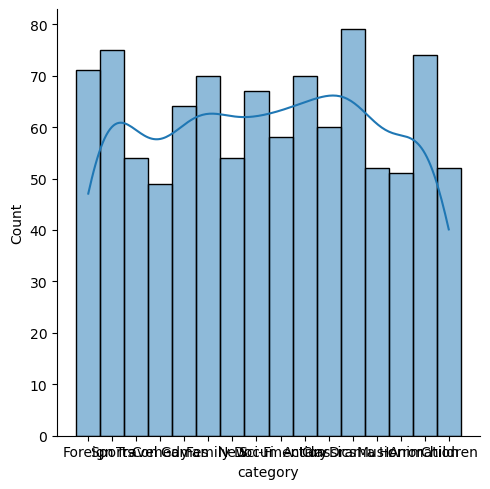

In [26]:
# look at the scale and distribution of values
sns.displot(film['length'], kde=True)
plt.show()

sns.displot(film['rental_rate'], kde=True)
plt.show()

sns.displot(film['rental_length'], kde=True)
plt.show()

sns.displot(film['category'], kde=True)
plt.show()

In [34]:
# X y split
y = film['rented_in_may']
X =film.drop(['rented_in_may'], axis = 1)

In [35]:
# Train, Test, Split
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (800, 7)
y_train shape is: (800,)
X_test shape is: (200, 7)
y_train shape is: (200,)


In [38]:
X_train.head()

,film_id,title,category,rental_rate,length,rating,rental_length
13649,449,IDENTITY LOVER,Sci-Fi,2.99,119,PG-13,8.0
8310,946,VIRTUAL SPOILERS,Family,4.99,144,NC-17,7.0
3860,633,OCTOBER SUBMARINE,Classics,4.99,54,PG-13,6.0
15302,88,BORN SPINAL,Travel,4.99,179,PG,3.0
14937,764,SATURDAY LAMBS,Sports,4.99,150,G,3.0


In [39]:
X_test.head()

,film_id,title,category,rental_rate,length,rating,rental_length
15425,181,CONTACT ANONYMOUS,Travel,2.99,166,PG-13,4.0
10550,275,EGYPT TENENBAUMS,Horror,0.99,85,PG,5.0
11617,426,HOME PITY,Music,4.99,185,R,9.0
12240,216,DAY UNFAITHFUL,New,4.99,113,G,3.0
9791,438,HUMAN GRAFFITI,Games,2.99,68,NC-17,4.0


In [40]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

In [44]:
# Deciding on Title
X_train_cat['title'] = X_train_cat['title'].str.split(',')
X_train_cat['title']

13649        [IDENTITY LOVER]
8310       [VIRTUAL SPOILERS]
3860      [OCTOBER SUBMARINE]
15302           [BORN SPINAL]
14937        [SATURDAY LAMBS]
                 ...         
7460       [CONFUSED CANDLES]
11010    [SPIRIT FLINTSTONES]
6385      [DECEIVER BETRAYED]
10071         [PIZZA JUMANJI]
736           [PRIMARY GLASS]
Name: title, Length: 800, dtype: object

In [45]:
#Encoding catagorical columns 'rating' and 'category'

In [27]:
# X-y split and train-test-split ,
# then train transformation on training set only
y = film['rented_in_may']
X = film.drop('film_id', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=258)

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = film.select_dtypes(include = np.number)
X_cat = film.select_dtypes(include = object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized, columns=X_num.columns)
x_norm.head()

,film_id,rental_rate,length,rental_length,rented_in_may
0,0.413828,0.5,0.208633,0.2,1.0
1,0.322645,1.0,0.956835,0.6,0.0
2,0.083166,1.0,0.402878,0.2,1.0
3,0.126253,1.0,0.474820,0.7,1.0
4,0.231463,0.5,0.726619,0.4,1.0


In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_rate,length,rental_length,rented_in_may
0,0.5,0.431655,0.4,0.0
1,0.0,0.489209,0.1,1.0
2,0.0,0.971223,0.3,1.0
3,1.0,0.956835,0.8,1.0
4,1.0,0.978417,0.3,1.0
...,...,...,...,...
795,1.0,0.115108,0.7,1.0
796,1.0,0.035971,0.2,0.0
797,0.0,0.374101,0.6,0.0
798,0.0,0.755396,0.3,0.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


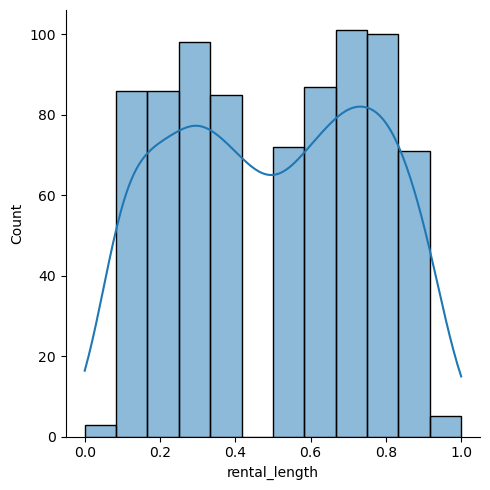

In [30]:
sns.displot(X_train_norm['rental_length'], kde=True)
plt.show()

In [31]:
X_train_num['rental_length'].apply(np.log)
# X_train_num['balance'].apply(np.log).describe() 
(X_train_num['rental_length'].apply(np.log)).describe()

count    794.000000
mean           -inf
std             NaN
min            -inf
25%        1.098612
50%        1.609438
75%        1.945910
max        2.302585
Name: rental_length, dtype: float64

In [56]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_normalized, X_train_cat], axis=1)

In [60]:
X_train


,film_id,title,category,rental_rate,length,rating,rental_length
13649,449,IDENTITY LOVER,Sci-Fi,2.99,119,PG-13,8.0
8310,946,VIRTUAL SPOILERS,Family,4.99,144,NC-17,7.0
3860,633,OCTOBER SUBMARINE,Classics,4.99,54,PG-13,6.0
15302,88,BORN SPINAL,Travel,4.99,179,PG,3.0
14937,764,SATURDAY LAMBS,Sports,4.99,150,G,3.0
...,...,...,...,...,...,...,...
7460,175,CONFUSED CANDLES,Family,2.99,122,PG-13,6.0
11010,830,SPIRIT FLINTSTONES,Horror,0.99,149,R,1.0
6385,218,DECEIVER BETRAYED,Drama,0.99,122,NC-17,8.0
10071,684,PIZZA JUMANJI,Games,2.99,173,NC-17,2.0


In [63]:
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [73]:
# Encoding catagorical columns 'rating' and 'category'
r = pd.get_dummies(X_train_cat['rating'], prefix='rating')
r2= pd.get_dummies(X_test_cat['rating'], prefix='rating')

In [70]:
c = pd.get_dummies(X_train_cat['category'], prefix='genre')
c2 = pd.get_dummies(X_test_cat['category'], prefix='genre')

In [71]:
display(r)
display(c)

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
13649,False,False,False,True,False
8310,False,True,False,False,False
3860,False,False,False,True,False
15302,False,False,True,False,False
14937,True,False,False,False,False
...,...,...,...,...,...
7460,False,False,False,True,False
11010,False,False,False,False,True
6385,False,True,False,False,False
10071,False,True,False,False,False


""
13649
8310
3860
15302
14937
...
7460
11010
6385
10071


In [74]:
train_encoded = pd.concat([c,r],axis=1)
test_encoded = pd.concat([c2,r2],axis=1)

In [75]:
X_train_cat = pd.concat([X_train_cat,train_encoded],axis=1)
X_test_cat = pd.concat([X_test_cat,test_encoded],axis=1)

In [76]:
list(X_train_cat.columns) == list(X_test_cat.columns) #?

False

In [ ]:
# Dropping encoded categories and title

In [78]:
X_train_cat = X_train_cat.drop(['rating', 'category', 'title'], axis = 1)
X_train_cat

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
13649,False,False,False,True,False
8310,False,True,False,False,False
3860,False,False,False,True,False
15302,False,False,True,False,False
14937,True,False,False,False,False
...,...,...,...,...,...
7460,False,False,False,True,False
11010,False,False,False,False,True
6385,False,True,False,False,False
10071,False,True,False,False,False


In [80]:
X_test_cat = X_test_cat.drop(['rating', 'category', 'title'], axis = 1)
X_test_cat

,genre_Action,genre_Animation,genre_Children,genre_Classics,genre_Comedy,genre_Documentary,genre_Drama,genre_Family,genre_Foreign,genre_Games,...,genre_Music,genre_New,genre_Sci-Fi,genre_Sports,genre_Travel,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
15425,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
10550,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11617,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
12240,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
9791,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13982,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1768,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5456,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Scaling numerical columns

In [82]:

from sklearn.preprocessing import MinMaxScaler

In [83]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

(800, 4)


,film_id,rental_rate,length,rental_length
13649,0.448898,0.5,0.525180,0.8
8310,0.946894,1.0,0.705036,0.7
3860,0.633267,1.0,0.057554,0.6
15302,0.087174,1.0,0.956835,0.3
14937,0.764529,1.0,0.748201,0.3


In [84]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(200, 4)


,film_id,rental_rate,length,rental_length
15425,0.180361,0.5,0.863309,0.4
10550,0.274549,0.0,0.280576,0.5
11617,0.425852,1.0,1.000000,0.9
12240,0.215431,1.0,0.482014,0.3
9791,0.437876,0.5,0.158273,0.4


In [85]:
X_train = pd.concat([X_train_num_scale,X_train_cat], axis = 1)
X_test = pd.concat([X_test_num_scale,X_test_cat], axis = 1)

In [86]:
X_train

,film_id,rental_rate,length,rental_length,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
13649,0.448898,0.5,0.525180,0.8,False,False,False,True,False
8310,0.946894,1.0,0.705036,0.7,False,True,False,False,False
3860,0.633267,1.0,0.057554,0.6,False,False,False,True,False
15302,0.087174,1.0,0.956835,0.3,False,False,True,False,False
14937,0.764529,1.0,0.748201,0.3,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7460,0.174349,0.5,0.546763,0.6,False,False,False,True,False
11010,0.830661,0.0,0.741007,0.1,False,False,False,False,True
6385,0.217435,0.0,0.546763,0.8,False,True,False,False,False
10071,0.684369,0.5,0.913669,0.2,False,True,False,False,False


In [93]:
# Logistic Regression -- Clean the NaN values! 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [99]:
X_train.isna().sum

<bound method DataFrame.sum of        film_id  rental_rate  length  rental_length  rating_G  rating_NC-17  \
13649    False        False   False          False     False         False   
8310     False        False   False          False     False         False   
3860     False        False   False          False     False         False   
15302    False        False   False          False     False         False   
14937    False        False   False          False     False         False   
...        ...          ...     ...            ...       ...           ...   
7460     False        False   False          False     False         False   
11010    False        False   False          False     False         False   
6385     False        False   False          False     False         False   
10071    False        False   False          False     False         False   
736      False        False   False          False     False         False   

       rating_PG  rating_PG-13  

In [94]:

from sklearn.metrics import confusion_matrix
prediction = logreg.predict(X_test)

NameError: name 'logreg' is not defined

In [95]:
y.value_counts()  

rented_in_may
1    801
0    199
Name: count, dtype: int64

In [ ]:
# Check it again!
# from sklearn.linear_model import LogisticRegression
# classification = LogisticRegression(random_state=0, solver='lbfgs',
#                  multi_class='multinomial').fit(X_train_transformed, y_train)